# Шаг 1. Откроем файл и изучим информацию

In [1]:
import pandas as pd

In [2]:
baza_market = pd.read_csv('/datasets/games.csv')

In [3]:
baza_market

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 2. Подготовим данные

Приведем столбцы к одному регистру

In [4]:
baza_market.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

Преобразуем данные в нужные типы

In [5]:
#Посмотрим информацию о таблице
baza_market.info()

# Так, приведем года к формату целого числа, заменим критик скор NaN на 0, так же поступим с юсер скор. Рейтинг заменим на pg_unknown
# С жанром и названием поступим также и заменим на unknown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
baza_market['year_of_release'] = baza_market['year_of_release'].fillna(0)
baza_market['year_of_release'] = baza_market['year_of_release'].astype('int')

#Не указанный год релиза скорее всего ошибка того кто заполнял таблицу. Мб данных было много и он не успел поставить дату или случайно забыл.


In [7]:
baza_market['name'] = baza_market['name'].fillna('unknown')
baza_market['genre'] = baza_market['genre'].fillna('unknown')

#Пропуски жанра и названия все тот же человеческий фактор, хотя может быть проблема со шрифтами и языком.

In [8]:
baza_market['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

«AO» («Adults Only 18+») — «Только для взрослых»

«M» («Mature») — «Для взрослых»

«T» («Teen») — «Подросткам»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«E» («Everyone») — «Для всех»

«EC» («Early childhood») — «Для детей младшего возраста»

«RP» («Rating Pending») — «Рейтинг ожидается

In [9]:
baza_market['critic_score'] = baza_market['critic_score'].fillna(0)
baza_market['user_score'] = baza_market['user_score'].fillna(0)
baza_market['rating'] = baza_market['rating'].fillna('RP')

#Пропуски в критик и юзер скор могут быть от того, что игру никто не оценивал. Пропуск в рейтинге может быть от того что его просто ещё не выставили
#Отнесем все наны в рейтинге в RP


In [10]:
baza_market['user_score'].value_counts()

#у нас имеется значение tbd, что означает  to be done или to be determined. В нашем случае будет логично поменять эту величину 
#на ноль, так и сделаем. 

baza_market['user_score'] = baza_market['user_score'].replace('tbd', 0)



In [11]:
#Переведем юзерскор в флоут вид. 
baza_market['user_score'] = baza_market['user_score'].astype('float')

baza_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Быстро проверим все строчки на аномалии. 

In [12]:
def auto_value(data):
    
    for row in data:
        data[row].value_counts()
        print(data[row].value_counts())

auto_value(baza_market)    

Need for Speed: Most Wanted                      12
Ratatouille                                       9
LEGO Marvel Super Heroes                          9
Madden NFL 07                                     9
FIFA 14                                           9
                                                 ..
Dragon Ball Z: Harukanaru Densetsu (JP sales)     1
Road Rash 64                                      1
AMF Bowling World Lanes                           1
Bomberman Land Touch! 2                           1
NBA Live 97                                       1
Name: name, Length: 11560, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       

In [13]:
#приведем строчки к одному шрифту и удалим дубликаты 
baza_market['name'] = baza_market['name'].str.lower()
baza_market['genre'] = baza_market['genre'].str.lower()
baza_market['platform'] = baza_market['platform'].str.lower()

In [14]:
baza_market.duplicated().sum()

#Полных дубликатов нет

0

Таблица предработана, приступаем к счету

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
baza_market['all_sales'] = baza_market['na_sales'] + baza_market['eu_sales'] + baza_market['jp_sales'] + baza_market['other_sales']

In [16]:
baza_market

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


# Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cba4f96d0>]],
      dtype=object)

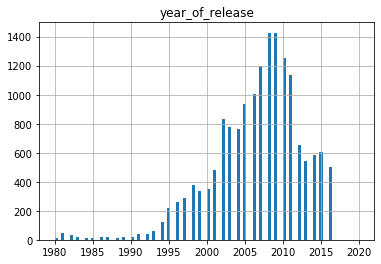

In [17]:
baza_market.hist('year_of_release', bins = 100, range = (1980, 2020))


Пик для игровой индустрии пришелся на 2008 и 2009 год. До 1994 индустрия не показывала особо больших результатов, можно выкинуть этот промежуток и работать со всем остальным. 

In [18]:
baza_market = baza_market.query('year_of_release >= 1994')

Посмотрим, как менялись продажи по платформам. 

In [19]:
import seaborn as sns
import numpy as np
from math import factorial
from scipy import stats as st
import matplotlib.pyplot as plt

In [71]:
def auto_pivot(data, column1, column2, sort, kind):
    kind = kind
    index = column1
    values = column2
    data = data.pivot_table(index=column1, values=column2, aggfunc='sum')
    data = data.reset_index()
    data = data.sort_values(sort)
    data.plot(x=column1, y=column2, kind=kind, grid=True, figsize=(12, 10))
    
    return data

def auto_plot(data, column1, column2, kind):
    data = data.plot(x=column1, y=column2, kind=kind, grid=True, figsize=(12, 10))
    return data

,platform,all_sales
12,pcfx,0.03
0,3do,0.10
9,nes,0.11
22,tg16,0.16
20,scd,0.36
10,ng,1.23
25,ws,1.42
7,gen,8.13
2,dc,15.95
19,sat,33.59


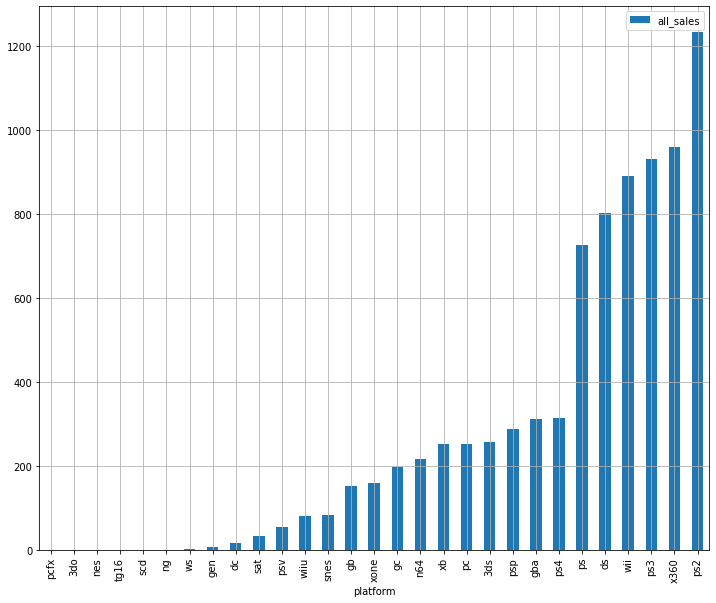

In [68]:
auto_pivot(baza_platform, 'platform', 'all_sales', 'all_sales', 'bar')

Из графика видно, что большинство продаж пришлось на топ6 платформ это три поколения плейстешен, ви и искбокс 360 и диэс 

In [69]:
baza_top6 = baza_market.query('platform == ["ps2", "x360", "ps3", "wii", "ds", "ps"]')
baza_top6 = baza_top6.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
baza_top6 = baza_top6.fillna(0)
baza_top6 = baza_top6.reset_index()

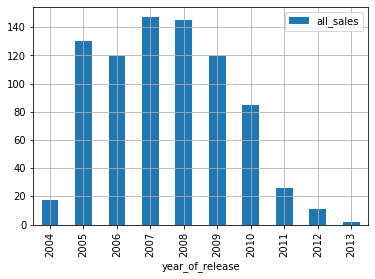

In [70]:
baza_ds = baza_top6.query('platform == "ds"')
auto_plot(baza_ds, 'year_of_release', 'all_sales', 'bar')                        

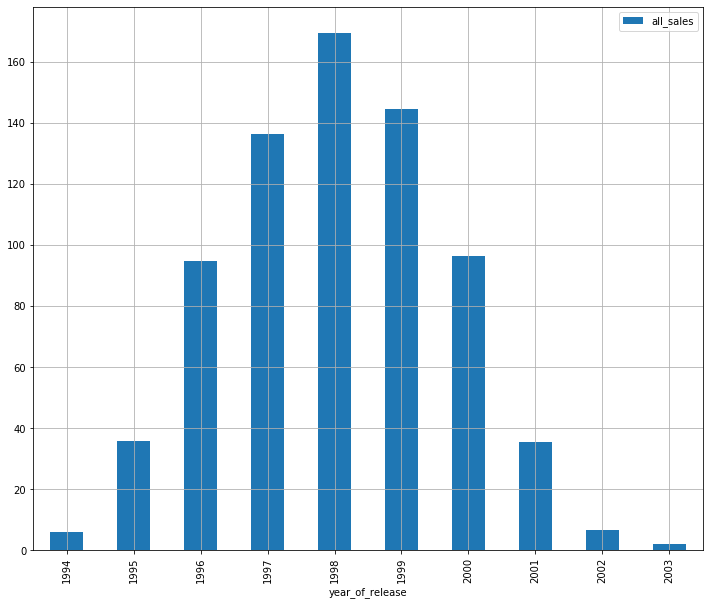

In [73]:
baza_ps = baza_top6.query('platform == "ps"')
auto_plot(baza_ps, 'year_of_release', 'all_sales', 'bar')

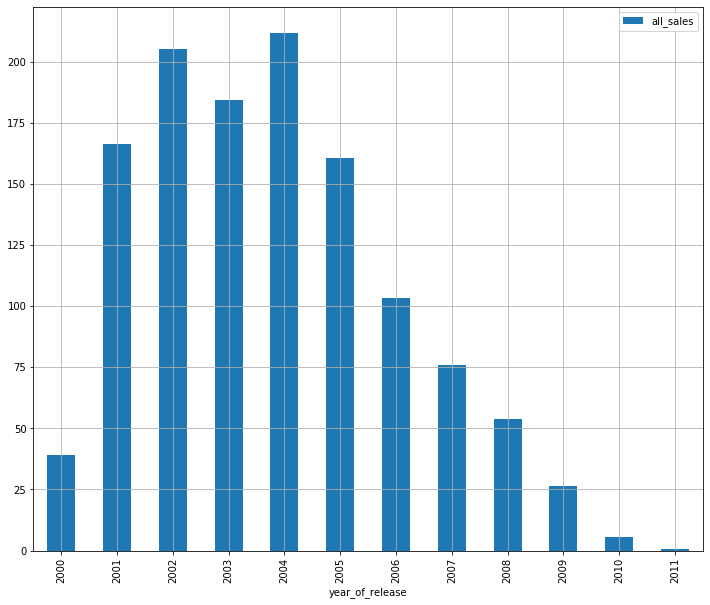

In [74]:
baza_ps2 = baza_top6.query('platform == "ps2"')
auto_plot(baza_ps2, 'year_of_release', 'all_sales', 'bar')

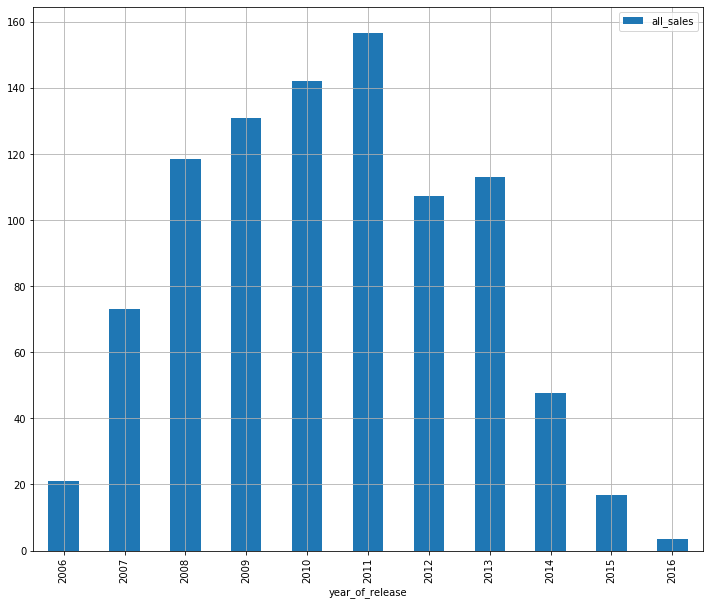

In [75]:
baza_ps3 = baza_top6.query('platform == "ps3"')
auto_plot(baza_ps3, 'year_of_release', 'all_sales', 'bar')

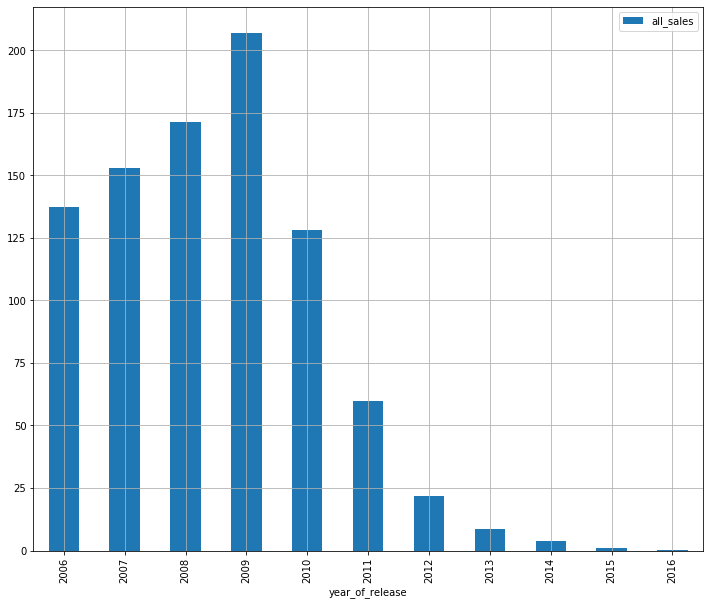

In [76]:
baza_wii = baza_top6.query('platform == "wii"')
auto_plot(baza_wii, 'year_of_release', 'all_sales', 'bar')

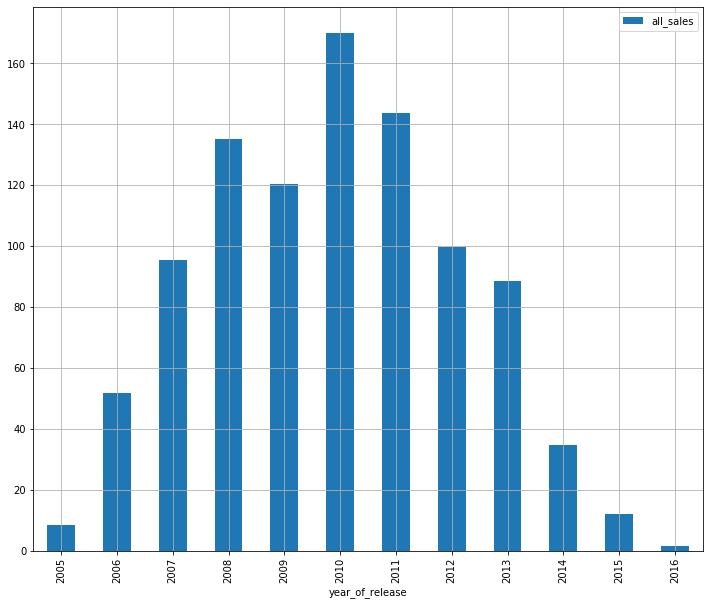

In [77]:
baza_x360 = baza_top6.query('platform == "x360"')
auto_plot(baza_x360, 'year_of_release', 'all_sales', 'bar')

Исходя из вышеприведенных графиков можно смело утверждать, что период жизни консоли равен 5-6 годам. На графиках статистики платформы плейстейшен можно проследить, что новая консоль выходит ровно через  года после ослабления продаж.

,platform,all_sales
4,psp,0.36
6,wii,5.07
5,psv,22.40
1,pc,27.05
7,wiiu,42.98
8,x360,48.22
2,ps3,68.18
0,3ds,86.68
9,xone,140.36
3,ps4,288.15


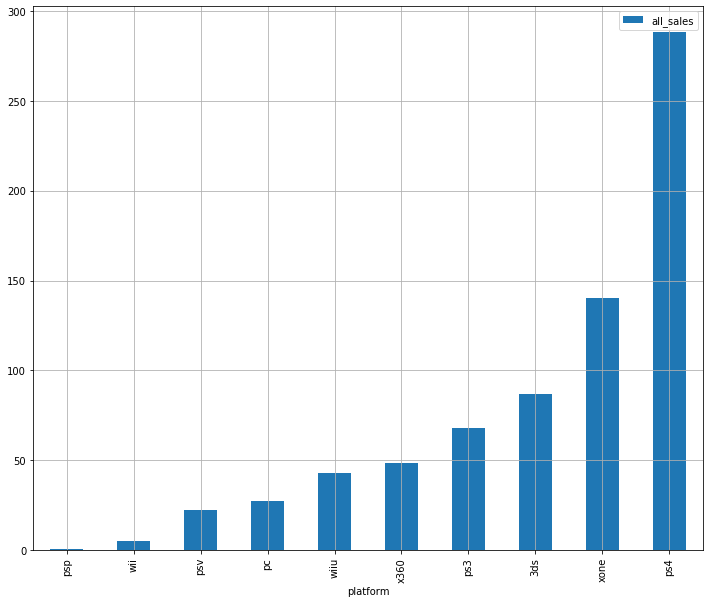

In [79]:
baza_2017 = baza_market.query('year_of_release >= 2014')

auto_pivot(baza_2017, 'platform', 'all_sales', 'all_sales', 'bar')

Учитывая наш вывод выше, что новое поколение платформ приходит ровно через год после ослабления продаж старого поколения, плюс ещё год консоль набирает обороты, то актуальный период логично рассчитывать с 2014 года. 17-й год скорее всего станет пиковым для консолей. 

In [29]:
baza_top = baza_market.query('platform == ["ps4", "3ds", "xone", "wiiu"]')
baza_top = baza_top.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
baza_top6 = baza_top.fillna(0)
baza_top = baza_top.reset_index()

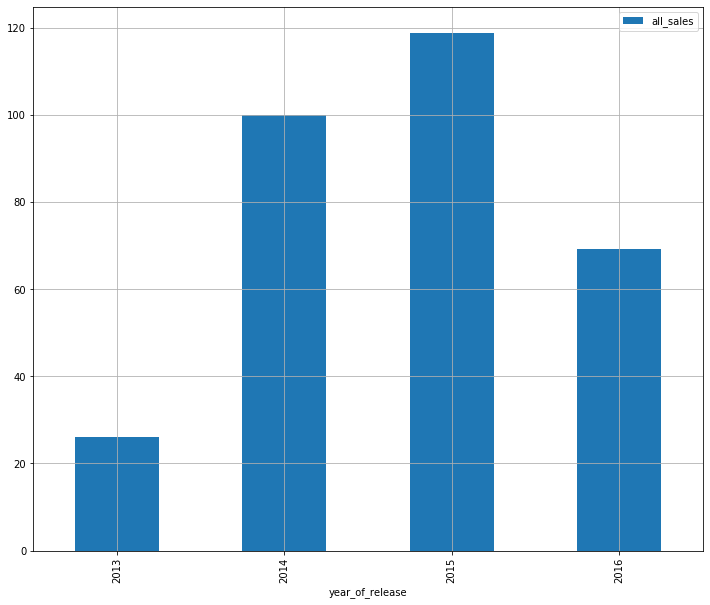

In [80]:
baza_ps4 = baza_top.query('platform == "ps4"')
auto_plot(baza_ps4, 'year_of_release', 'all_sales', 'bar')

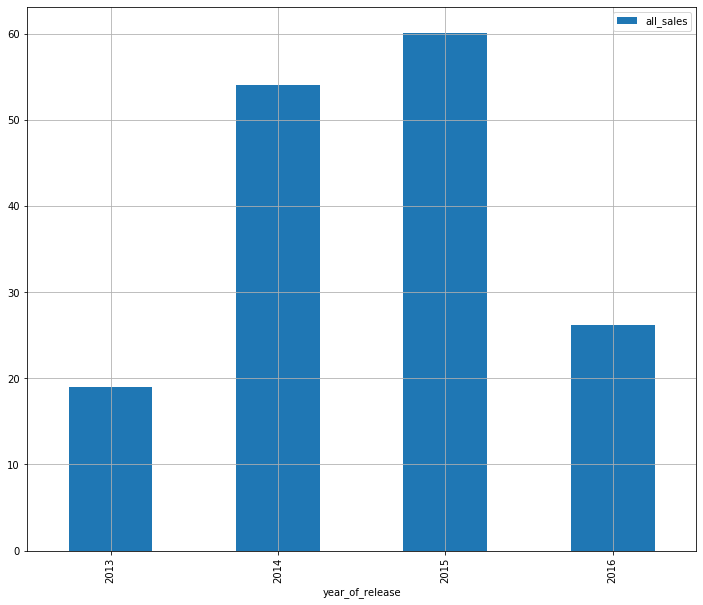

In [81]:
baza_xone = baza_top.query('platform == "xone"')
auto_plot(baza_xone, 'year_of_release', 'all_sales', 'bar')

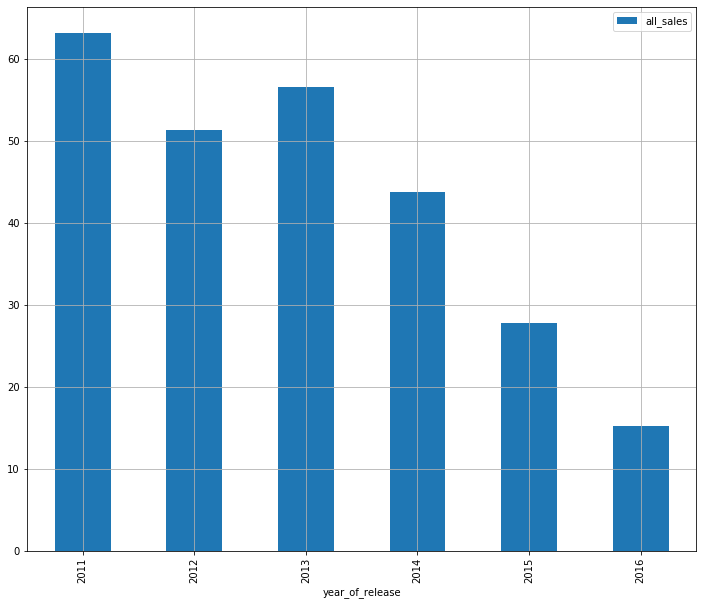

In [82]:
baza_3ds = baza_top.query('platform == "3ds"')
auto_plot(baza_3ds, 'year_of_release', 'all_sales', 'bar')

На данный момент есть всего две платформы с растущими продажами это PS4 и Xbox One. Т.к их появление пришлось на 13-й год, то  пройдет ровно 4 года с момента их появления на рынке, учитывая прошлые показатели линейки можно смело утверждать, что Xbox One и PS4 покажут достойный результат в 17-ом году. 

Построим график boxplot по глобальным продажам каждой игры и разбивкой по платформам. 

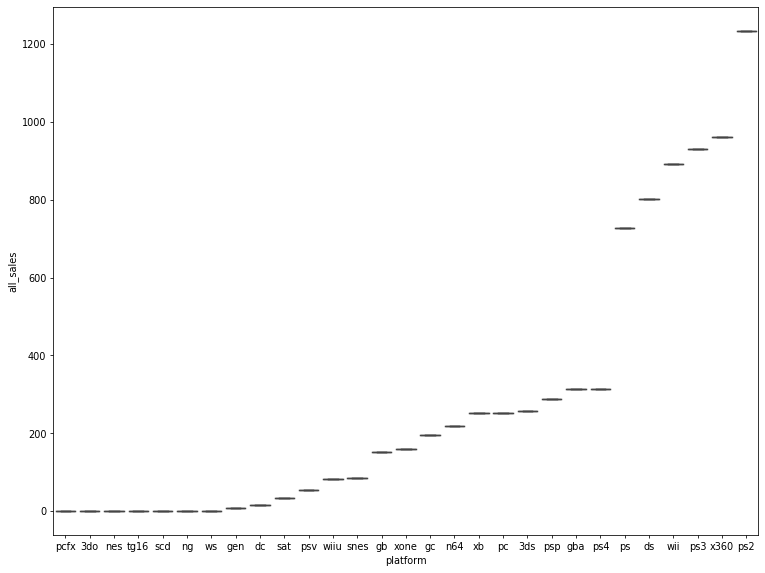

In [83]:
#plt.xlim(1000)
#sns.boxplot(x="platform", y="all_sales", data=baza_platform, palette='rainbow')


plt.figure(figsize=(13,10), dpi= 70)
sns.boxplot(x='platform', y='all_sales', data=baza_platform)



Из графика видно, что c невероятным разрывом идут три поколения PS, Xbox и Wii и DS. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [84]:
baza_ps2_critic = baza_market.query('critic_score > 0 and user_score > 0 and platform == "ps2"') 

In [85]:
baza_ps2_critic

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
17,grand theft auto: san andreas,ps2,2004,action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,grand theft auto: vice city,ps2,2002,action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,gran turismo 3: a-spec,ps2,2001,racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,gran turismo 4,ps2,2004,racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16011,kao the kangaroo round 2,ps2,2005,platform,0.01,0.01,0.00,0.00,58.0,8.7,E,0.02
16050,just cause,ps2,2006,action,0.01,0.01,0.00,0.00,67.0,7.9,M,0.02
16287,metal slug anthology,ps2,2007,shooter,0.00,0.00,0.01,0.00,80.0,8.1,T,0.01
16429,greg hastings' tournament paintball max'd,ps2,2006,shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+,0.01


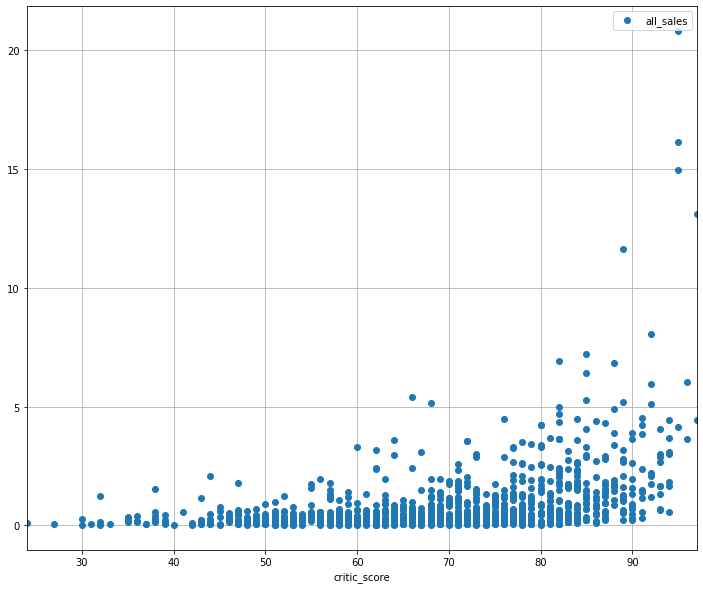

In [86]:
baza_ps2_critic.plot(y='all_sales', x='critic_score', style='o', grid=True, figsize=(12, 10))

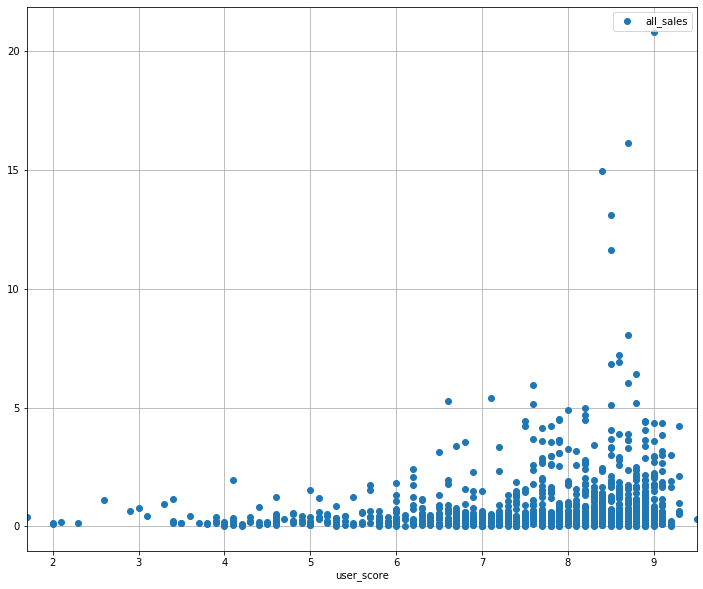

In [87]:
baza_ps2_critic.plot(y='all_sales', x='user_score', style='o', grid=True, figsize=(12, 10))

In [88]:
baza_ps2_critic['all_sales'].corr(baza_ps2_critic['user_score'])

0.17168986651472434

In [89]:
baza_ps2_critic['all_sales'].corr(baza_ps2_critic['critic_score'])

0.3864151028406

Для исследования я выбрал самую популярную платформу ps2 и на ее примере показал, что отзывы почти не влияют на продажи. Отзывы пользователей почти не имеют значения в то время как отзывы критиков чуть больше делают продажи. Думаю это связано с тем, что критики играют в игру до её релиза и на основе их отзыва люди думаю о покупке. 

In [90]:
baza_x360_critic = baza_market.query('critic_score > 0 and user_score > 0 and platform == "x360"') 

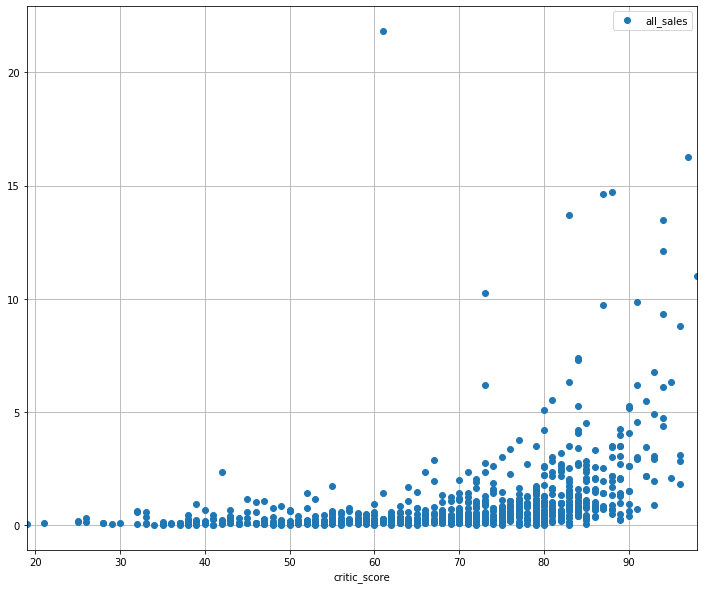

In [91]:
baza_x360_critic.plot(y='all_sales', x='critic_score', style='o', grid=True, figsize=(12, 10))

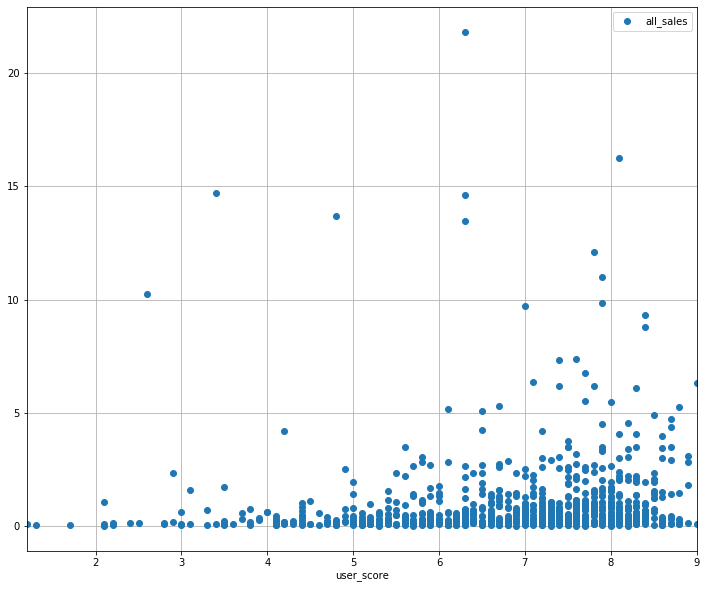

In [92]:
baza_x360_critic.plot(y='all_sales', x='user_score', style='o', grid=True, figsize=(12, 10))

In [93]:
baza_x360_critic['all_sales'].corr(baza_x360_critic['critic_score'])

0.3889921155786253

In [94]:
baza_x360_critic['all_sales'].corr(baza_x360_critic['user_score'])

0.11027967172869052

Xbox показал такую же тенденцию. Можно сделать вывод, что на всех остальных платформах зависимость продаж от отзывов критиков и юзеров, похожа. 

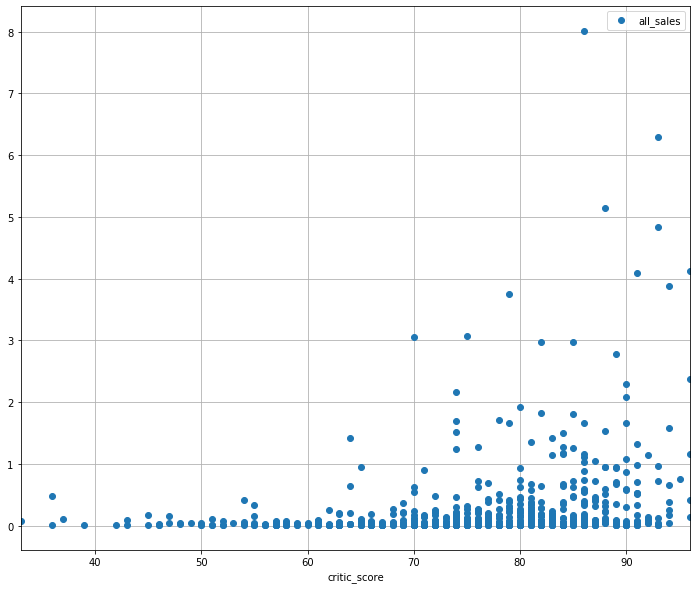

In [95]:
baza_pc_critic = baza_market.query('critic_score > 0 and user_score > 0 and platform == "pc"') 
baza_pc_critic.plot(y='all_sales', x='critic_score', style='o', grid=True, figsize=(12, 10))

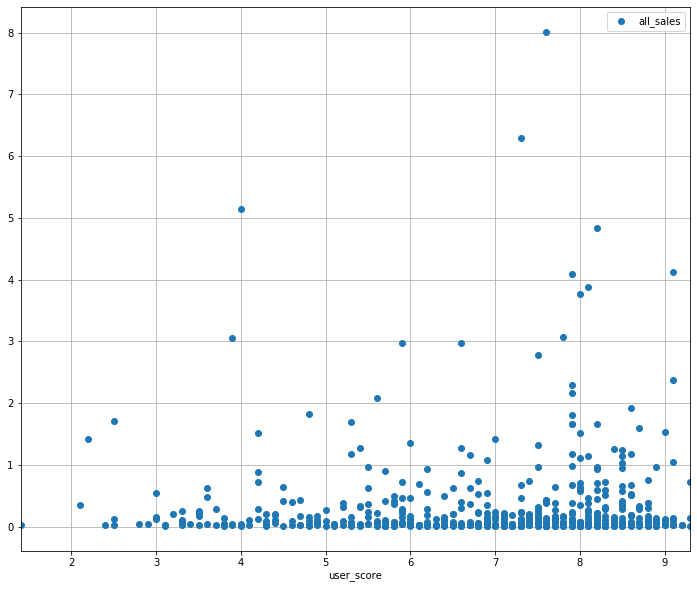

In [96]:
baza_pc_critic.plot(y='all_sales', x='user_score', style='o', grid=True, figsize=(12, 10))

In [97]:
baza_pc_critic['all_sales'].corr(baza_pc_critic['critic_score'])

0.2572199346042397

In [98]:
baza_pc_critic['all_sales'].corr(baza_pc_critic['user_score'])

0.0019531042567012165

На ПК, тенденция все ещё прослеживается 

Посмотрим на общее распределение игр по жанрам. 

In [45]:
baza_genre = baza_market.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum')

In [46]:
baza_genre = baza_genre.reset_index()
baza_genre = baza_genre.sort_values(by = 'all_sales')

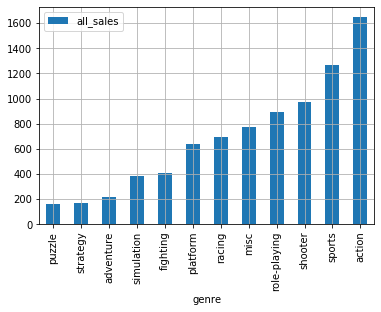

In [47]:
baza_genre.plot(x='genre', y='all_sales', kind='bar', grid=True)

Экшен игры крайне сильно выделяются на фоне остальных жанров. Самые не популярные жанры это те, где от поьзователя требуется высокий порог вхождения, в случае с пазлами, стратегиями и файтингами, эта тенденция прослеживается ведь там надо долго и тщательно вникать в процесс из-за чего они крайне плохо продаются. В то время, как экшен, спорт и шутеры не требуют от игроков сильных усилий при освоении игрового процесса. 

# Шаг 4. Составим портрет пользователя каждого региона

Самые популярные платформы (топ-5). Опишем различия в долях продаж.


,platform,na_sales
0,3do,0.00
25,ws,0.00
22,tg16,0.00
9,nes,0.00
10,ng,0.00
12,pcfx,0.00
20,scd,0.00
19,sat,0.72
7,gen,5.21
2,dc,5.43


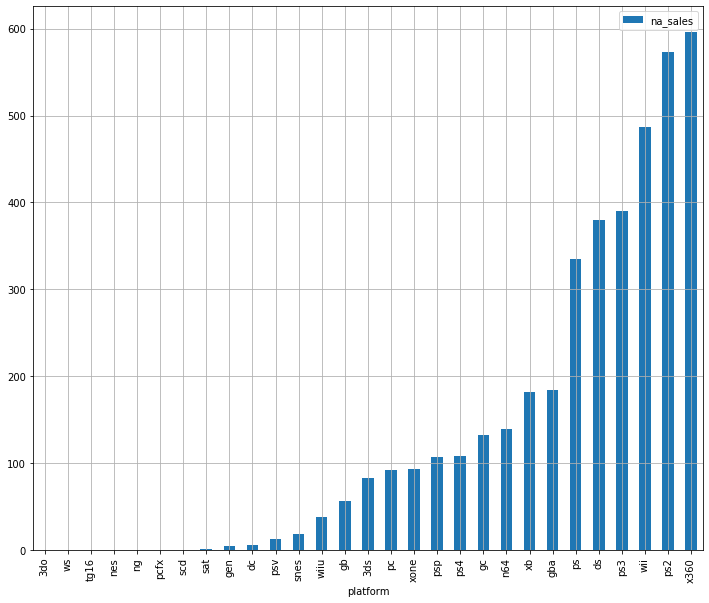

In [48]:
def auto_pivot(data, column1, column2, sort, kind):
    kind = kind
    index = column1
    values = column2
    data = data.pivot_table(index=column1, values=column2, aggfunc='sum')
    data = data.reset_index()
    data = data.sort_values(sort)
    data.plot(x=column1, y=column2, kind=kind, grid=True, figsize=(12, 10))
    
    return data

 
auto_pivot(baza_market, 'platform', 'na_sales', 'na_sales', 'bar')    
    
#baza_market_na = baza_market.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
#baza_market_jp = baza_market.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
#baza_market_eu = baza_market.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
#baza_market_oth = baza_market.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')


#baza_market_na = baza_market_na.reset_index()
#baza_market_jp = baza_market_jp.reset_index()
#baza_market_eu = baza_market_eu.reset_index()
#baza_market_oth = baza_market_oth.reset_index()


,platform,jp_sales
12,pcfx,0.03
0,3do,0.10
9,nes,0.11
22,tg16,0.16
11,pc,0.17
28,xone,0.34
20,scd,0.36
7,gen,0.93
10,ng,1.23
27,xb,1.38


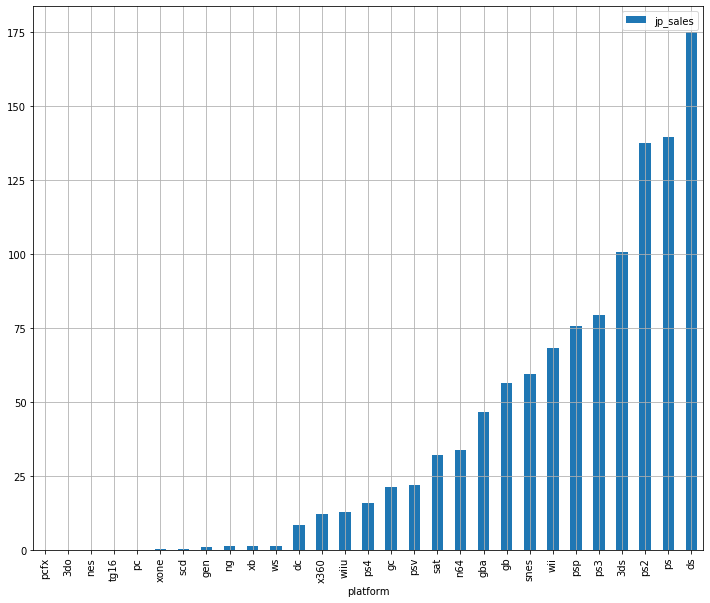

In [49]:
auto_pivot(baza_market, 'platform', 'jp_sales', 'jp_sales', 'bar') 

,platform,eu_sales
0,3do,0.00
25,ws,0.00
22,tg16,0.00
9,nes,0.00
10,ng,0.00
12,pcfx,0.00
20,scd,0.00
19,sat,0.54
7,gen,1.68
2,dc,1.69


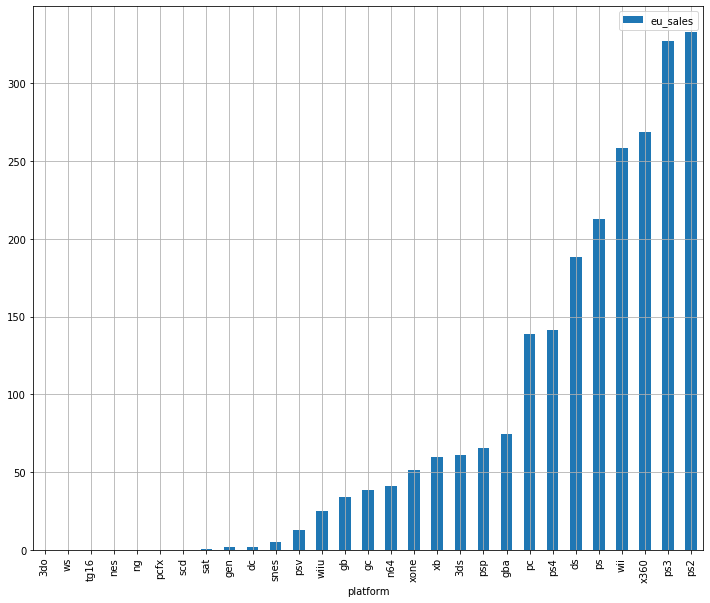

In [50]:
auto_pivot(baza_market, 'platform', 'eu_sales', 'eu_sales', 'bar') 

,platform,other_sales
0,3do,0.00
20,scd,0.00
22,tg16,0.00
12,pcfx,0.00
10,ng,0.00
9,nes,0.00
25,ws,0.00
19,sat,0.07
2,dc,0.27
7,gen,0.31


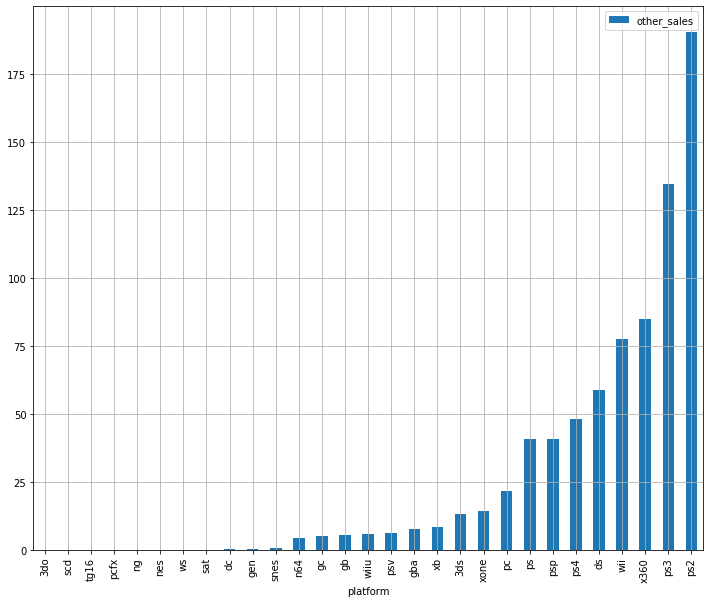

In [51]:
auto_pivot(baza_market, 'platform', 'other_sales', 'other_sales', 'bar') 

Посмотрим на график северной америки.Топ в нем возглавил xbox, что не типично для всех остальных стран. При этом из приставок нового поколения лидирует ps4. Сложно спрогнозировать, какая консоль покорит рынок в следующем году. Ведь до этого первая версия xbox очень сильно проиграла японскому конкуренту в лице ps2. 

На японском рынке с огромным отрывом вырывается портативная платформа диэс. Думаю секрет прост. Японцы обладают крайне маленькими площадями и зачастую разместить у себя консоль с тв крайне проблематично. Япония единственная в своем роде страна, где портативная консоль идет в отрыве от всех остальных. 

Европейский рынок захватили японцы со своей платформой playstation, xbox также показал неплохие результаты, что говорит о том, что европейский пользователь не определился, что лучше, хоть и делает ставку на японскую консоль.

Пользователи другого сектора крайне схожи с европейским. 


Самые популярные жанры (топ-5). Поясниим разницу

,genre,na_sales
11,strategy,67.43
5,puzzle,71.27
1,adventure,91.92
9,simulation,177.39
2,fighting,208.11
7,role-playing,328.41
4,platform,333.71
6,racing,342.82
3,misc,393.92
8,shooter,531.30


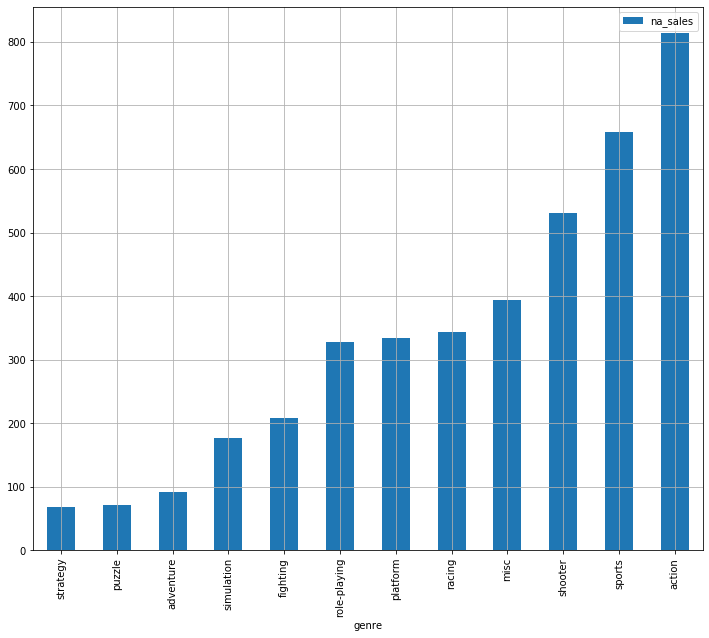

In [52]:
auto_pivot(baza_market, 'genre', 'na_sales', 'na_sales', 'bar') 

,genre,jp_sales
8,shooter,31.73
5,puzzle,35.10
1,adventure,46.55
6,racing,46.86
11,strategy,47.56
9,simulation,62.06
2,fighting,72.11
4,platform,84.07
3,misc,99.97
10,sports,109.54


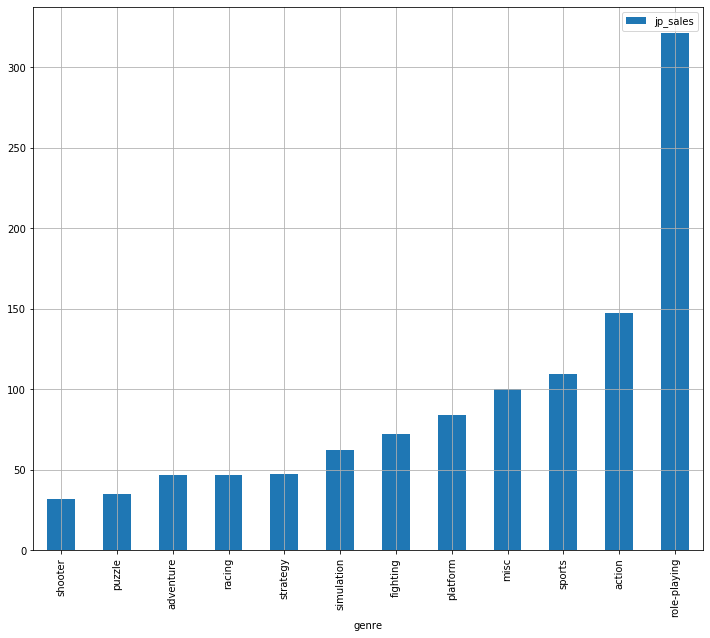

In [53]:
auto_pivot(baza_market, 'genre', 'jp_sales', 'jp_sales', 'bar') 

,genre,eu_sales
5,puzzle,42.74
11,strategy,44.74
1,adventure,59.56
2,fighting,95.48
9,simulation,112.00
4,platform,175.76
7,role-playing,188.08
3,misc,209.69
6,racing,230.32
8,shooter,310.80


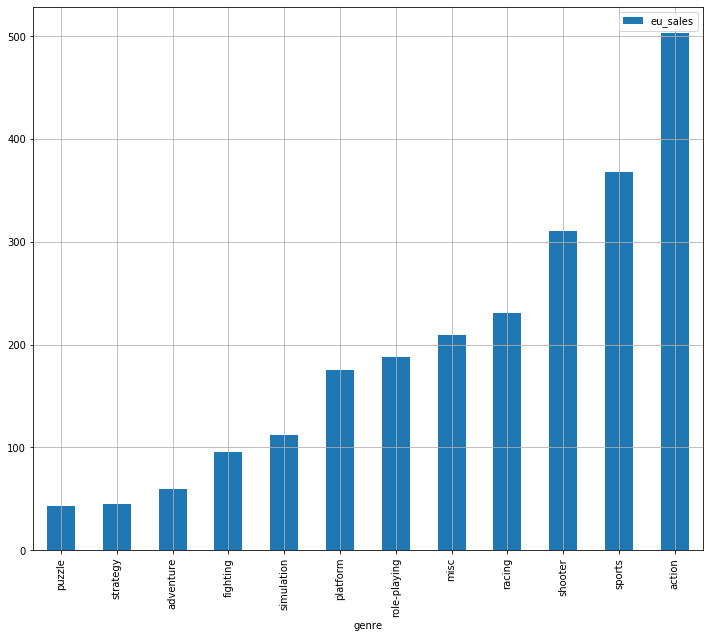

In [54]:
auto_pivot(baza_market, 'genre', 'eu_sales', 'eu_sales', 'bar') 

,genre,other_sales
11,strategy,10.72
5,puzzle,10.79
1,adventure,15.96
9,simulation,30.39
2,fighting,35.35
4,platform,47.05
7,role-playing,57.71
3,misc,72.95
6,racing,74.59
8,shooter,102.41


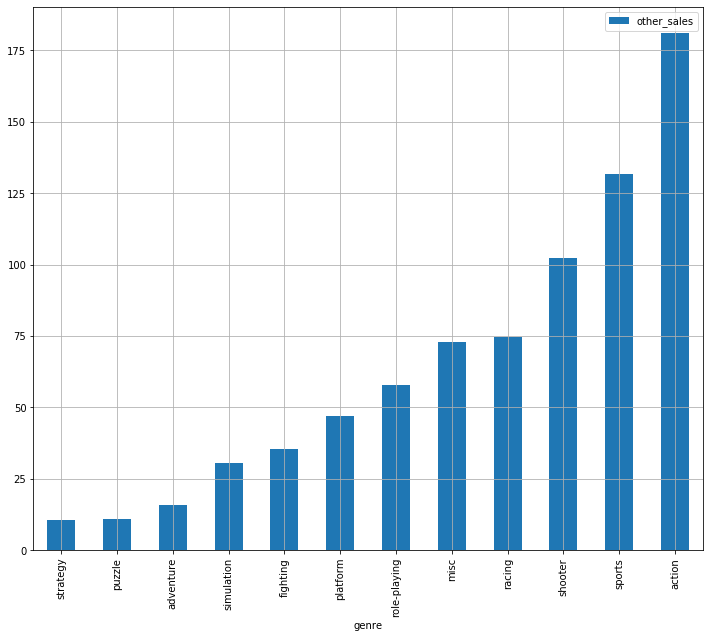

In [55]:
auto_pivot(baza_market, 'genre', 'other_sales', 'other_sales', 'bar') 

Во всех трех регионах кроме японии наблюдается одна и та же тенденция. Экшен, спорт и шутеры. За четвертое место соревнуются гонки или миск игры. 

В Японии с невероятным отрывом лидируют рпг игры. Причем разрыв именно, что значительный во всех остальных регионах нету такой разницы между первым и вторым местом. Сложно сказать почему в японии такая сильная любовь к  ̶а̶н̶и̶м̶е̶ , рпг. 


Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [56]:
baza_market

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


,rating,na_sales
0,AO,1.26
3,EC,1.53
4,K-A,2.56
2,E10+,345.50
5,M,742.87
6,T,747.58
1,E,1274.24


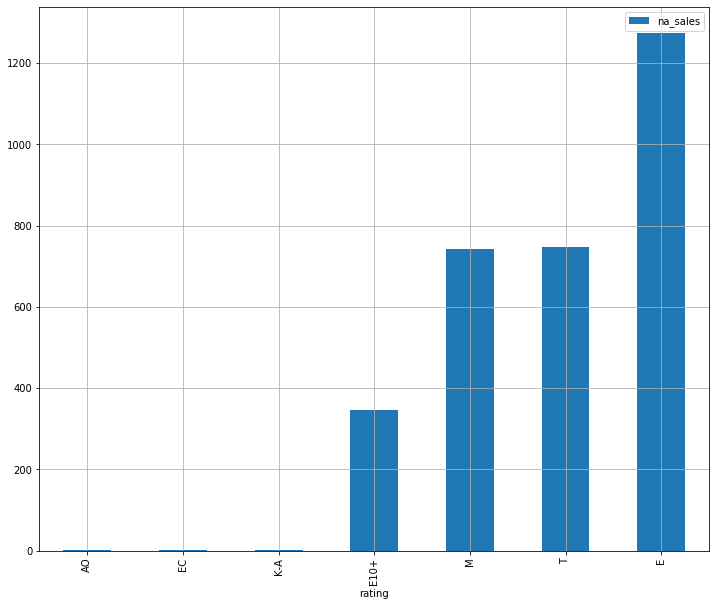

In [57]:
baza_rating = baza_market.query('rating != "RP"')

auto_pivot(baza_rating, 'rating', 'na_sales', 'na_sales', 'bar') 


,rating,jp_sales
0,AO,0.00
3,EC,0.00
4,K-A,1.46
2,E10+,40.20
5,M,63.58
6,T,150.70
1,E,197.96


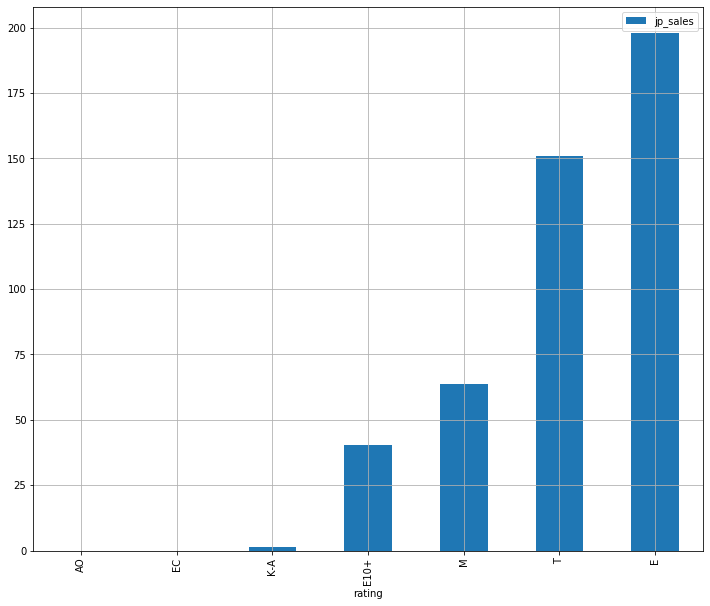

In [58]:
auto_pivot(baza_rating, 'rating', 'jp_sales', 'jp_sales', 'bar') 

,rating,eu_sales
3,EC,0.11
4,K-A,0.27
0,AO,0.61
2,E10+,183.33
6,T,420.99
5,M,480.00
1,E,703.87


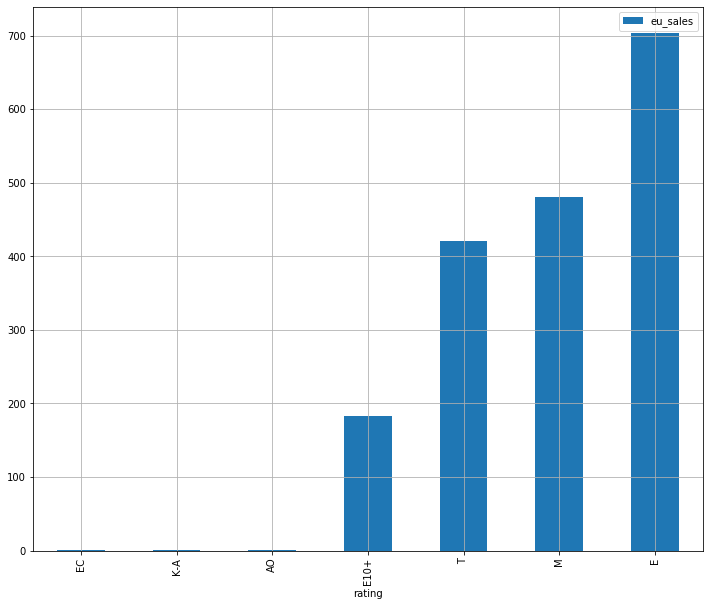

In [59]:
auto_pivot(baza_rating, 'rating', 'eu_sales', 'eu_sales', 'bar') 

,rating,other_sales
4,K-A,0.03
0,AO,0.09
3,EC,0.11
2,E10+,71.92
6,T,152.98
5,M,176.06
1,E,231.54


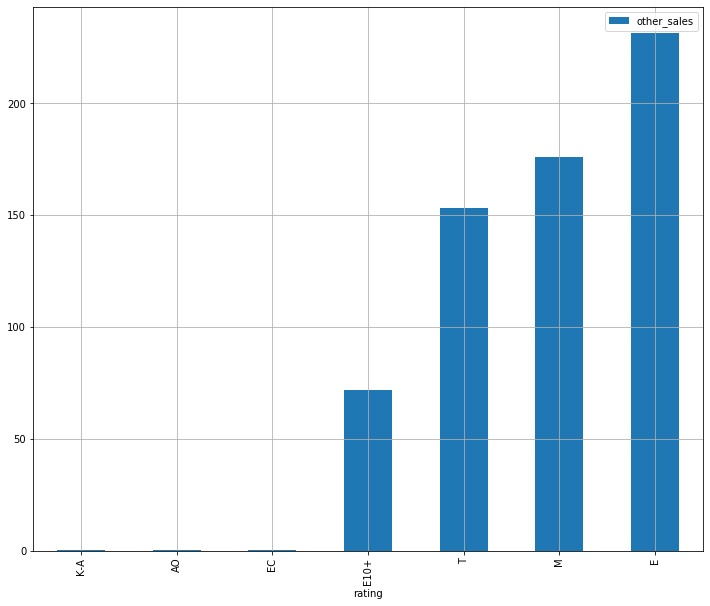

In [60]:
auto_pivot(baza_rating, 'rating', 'other_sales', 'other_sales', 'bar') 

Самыми продоваемыми идут игры с ретийнгом E во всех регионах. Затем ситуация меняется. В NA второе место занимают игры с рейтингом T, но игры с рейтингом M продаются почти в таком же количестве. В Японии напротив игры с рейтигом T доминируют над M. В Европе и других регионах же M игры занимают второе место. И тут у нас огромный простор для размышлений.

В принципе популярность взрослых игр в европе и других регионах можно объяснить бедностью, в статистике этого нет, но это кажется вполне логичным. Т.к денег мало, то покупать платформу для развлечения детей такая себе идея и пользователь покупает её для развлечения себя. От того рейтинг M в этих странах крайне высокий, потому что взрослым не интресны детские игры. 

«AO» («Adults Only 18+») — «Только для взрослых»

«M» («Mature») — «Для взрослых»

«T» («Teen») — «Подросткам»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«E» («Everyone») — «Для всех»

«EC» («Early childhood») — «Для детей младшего возраста»

«RP» («Rating Pending») — «Рейтинг ожидается

# Шаг 5. Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем гипотезы. 

Нулевая - Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [61]:
baza_user_score_pc = baza_market.query('platform == "pc" and user_score > 0')
baza_user_score_xone = baza_market.query('platform == "xone" and user_score > 0')


In [62]:
alpha = .05

results =  st.ttest_ind(
    baza_user_score_pc['user_score'], 
    baza_user_score_xone['user_score'])
    

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  9.379956219356061e-06
Отвергаем нулевую гипотезу


 Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Нулевая гипотеза = Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны.

Альтернативная гипотеза = Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») не равны.

In [63]:
baza_user_score_action = baza_market.query('genre == "action" and user_score > 0')
baza_user_score_sports = baza_market.query('genre == "sports" and user_score > 0')

In [64]:
alpha = .05

results =  st.ttest_ind(
    baza_user_score_action['user_score'], 
    baza_user_score_sports['user_score'])
    

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») не равны.

# Шаг 6. Общий вывод

Можно ответить на главный вопрос на какие игры стоит сделать ставку в 17-ом году. Что же. Первое, что мы должны знать это Япония. Япония- отдельный мир со своими устоями и любимыми платформами. На данный момент осталось всего две платформы популярность, которых все ещё растет это PS4 и Xone. Как мы уже убедились в Японии практически никто не использует платформы компании майкрасофт, так что в продажах стоит уделить внимание именно PS4, можно так же взглянуть на увядающий 3ds, но скорее всего на рынке вскоре появится новая портативная консоль. Лучший вариант для компании сосредоточиться на продаже РПГ игр на PS4 с возрастными рейтингами для всех и подростков в японском регионе. 

В Американском регионе стоит сделать ставку на экшен, спорт и шутеры и охватить сразу две приставки PS4 и Xone. Стоит обратить внимание на взрослый сегмент игр, ведь он продается в таком же количестве, как и подростковые.

Для Европы и других стран тот же прогноз, но сегмент взрослых игр тут более популярен. 

Одной из самых популярных консолей всех времен оказалась PS2. Именно в её время больше всего людей покупало игры. 

Мы выяснили, что рейтинги критиков и пользователей не имеют большого влияния на продажи игр. Хотя хорошая оценка может слегка прибавить покупателей. 


Мы выяснили, что рейтинги юзеров в отношении жанров спорт и  экшен одинаковые. PC и Xbox наоборот отличаются. 

Как ни странно, золотая эпоха продаж пришлась на 8-ой, а потом резко упала и стагнировала. Сложно сказать почему так получилось, возможно у людей появились стримы и летсплеи и теперь им лень играть самим.  
